In [7]:
from voidiness import voidy_analysis
from matplotlib import pyplot as plt
import pandas as pd

In [9]:
# 12m 36.6s seconds to run. WOW
# filtered_sdss_dr16 = voidy_analysis('exported_dataFrames/voids.xlsx','exported_dataFrames/z_ra_dec_filtered_SDSS_DR16.xlsx') # commented out since its saved and it takes 13 minutes to run
sdss_dr16 = pd.read_excel('exported_dataFrames/sdss_dr16_w_voidiness.xlsx')
four_lac = voidy_analysis('exported_dataFrames/voids.xlsx','exported_dataFrames/z_ra_dec_filtered_4lac.xlsx' )
xray_agns = voidy_analysis('exported_dataFrames/voids.xlsx', 'exported_dataFrames/z_ra_dec_filtered_xray_agns.xlsx' )

In [6]:
# Saving so i don't have to wait 13 minutes for it to calculate
# This also takes 1m 35s to save. wow
# filtered_sdss_dr16.to_excel('exported_dataFrames/sdss_dr16_w_voidiness.xlsx')

In [11]:
# Base plotting code, the only thing we tweak is the data we're plotting.
# The bins and label

def custom_plot_hist(data, labels, bins):

    for dat, label, bin in zip(data, labels, bins):
        plt.hist([dat], 
            bins=bin, 
            histtype="step", 
            density=True, 
            stacked=False,
            label=label)
        
    plt.xlabel('Voidiness [$D_{\\rm Void}/D_{\\rm Total}$]')
    plt.ylabel('Normalized Fraction')
    plt.title('Voidiness Histogram')

    plt.grid()

    plt.legend()

    plt.text(0.5, 0.5, 'Preliminary',  # Adjust the position as needed
                fontsize=30, color='gray', alpha=0.5,
                ha='center', va='center', transform=plt.gca().transAxes)

    plt.tight_layout()
    plt.show()


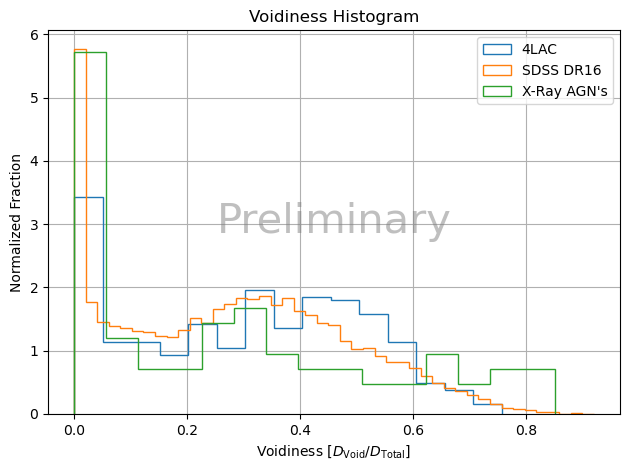

In [12]:
# Everything to be plotted on the histogram will be appended to the master lisst
# if something needs to be changed for a specific histogram, edit the relavent 
# bit of code
VOIDINESS_DATA = [] # list of panda series with voidiness data.
LABELS = []
BINS = []

# 4LAC DATA
VOIDINESS_DATA.append(four_lac.Voidiness)
LABELS.append("4LAC")
BINS.append(15)

# SDSS DR16 Optical Galaxies
VOIDINESS_DATA.append(sdss_dr16.Voidiness)
LABELS.append("SDSS DR16")
BINS.append(45)

# SDSS DR16 Optical Galaxies
VOIDINESS_DATA.append(xray_agns.Voidiness)
LABELS.append("X-Ray AGN's")
BINS.append(15)

custom_plot_hist(VOIDINESS_DATA, LABELS, BINS)


In [14]:
# Plottinf just the 4lac distribution then filter by SED_class

# First decode the byte data to strings
four_lac['SED_class'] = four_lac['SED_class'].apply(lambda x: x.decode('UTF-8'))

AttributeError: 'str' object has no attribute 'decode'

In [13]:
four_lac

,Source_Name,DataRelease,RAdeg,DEdeg,GLON,GLAT,Signif_Avg,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,SpectrumType,PL_Index,Unc_PL_Index,Pivot_Energy,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,Flags,CLASS,ASSOC1,ASSOC_PROB_BAY,ASSOC_PROB_LR,Counterpart_Catalog,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,VLBI_Counterpart,z,SED_class,HE_EPeak,Unc_HE_EPeak,HE_nuFnuPeak,Unc_HE_nuFnuPeak,nu_syn,nuFnu_syn,Variability_Index,Frac_Variability,Unc_Frac_Variability,Highest_energy,cmvd_Mpc,Voidiness
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1083,b'4FGL J0740.9+3203',1,115.233498,32.058102,187.730225,23.807297,7.139907,1.830028e-10,3.003307e-11,2.201697e-12,3.663866e-13,b'PowerLaw',2.287832,0.120585,1579.642700,2.261868,0.143207,0.034395,0.071485,0,b'bll',b'LEDA 1979979',0.961101,0.000000,b'bzcat',115.274774,32.095598,1.100000e-06,b'RFC J0741+3205',0.179000,b'HSP',3.509883e+01,3.091250e+02,3.602308e-07,4.484747e-07,2.089296e+15,3.940352e-13,7.714622,0.000000,10.000000,28.136600,743.317642,0.000000
1107,b'4FGL J0748.6+2400',1,117.163803,24.016600,196.602417,22.733208,20.736219,6.672882e-10,4.782816e-11,8.557362e-12,5.613735e-13,b'PowerLaw',2.368131,0.051727,1104.363281,2.346283,0.060671,0.040686,0.033192,0,b'fsrq',b'OI 275',0.998985,0.987750,b'cgrabs',117.150455,24.006697,6.800000e-08,b'RFC J0748+2400',0.409854,b'LSP',1.566571e+01,5.873298e+01,1.942033e-06,1.332369e-06,8.912509e+12,4.337485e-12,138.798660,0.754062,0.174806,51.158001,1607.468285,0.304681
1108,b'4FGL J0749.2+2314',1,117.321701,23.233700,197.450912,22.589090,7.471976,1.526331e-10,3.570272e-11,1.710354e-12,3.750885e-13,b'PowerLaw',1.987818,0.165349,4926.075684,1.996519,0.144650,-0.031152,0.054163,0,b'bll',b'RX J0749.2+2313',0.997878,0.866934,b'bllac',117.308456,23.221361,3.676111e-06,b'RFC J0749+2313',0.175000,b'HSP',NaN,NaN,-inf,-inf,1.995262e+15,5.224876e-13,5.235967,0.000000,10.000000,40.649200,727.397455,0.224517
1109,b'4FGL J0749.3+4453',1,117.348198,44.891800,174.344604,28.657005,17.614281,4.897895e-10,4.222521e-11,4.084697e-12,4.990219e-13,b'LogParabola',2.271184,0.059076,1126.068848,2.142375,0.109669,0.151136,0.061128,0,b'bcu',b'SDSS J074916.88+445232.1',0.992016,0.000000,b'rfc',117.320361,44.875551,1.400000e-07,b'RFC J0749+4452',0.559233,b'LSP',7.030818e+02,3.353489e+02,6.541273e-07,6.674200e-08,1.840772e+13,9.348135e-13,59.372066,0.569686,0.148386,28.370800,2110.319837,0.078185
1120,b'4FGL J0751.4+2655',1,117.866402,26.927500,193.857742,24.328171,5.744381,1.292270e-10,3.144328e-11,8.367472e-13,2.246511e-13,b'LogParabola',1.975983,0.147960,3339.171631,1.807075,0.282605,0.379425,0.236372,0,b'bcu',b'MG2 J075139+2657',0.988555,0.866678,b'crates',117.904675,26.952224,1.400000e-07,b'RFC J0751+2657',0.333965,b'LSP',4.305772e+03,1.594061e+03,1.821749e-07,4.907080e-08,2.884032e+13,3.829032e-13,21.180571,0.500351,0.413318,-inf,1335.232038,0.096010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2554,b'4FGL J1653.8+3945',1,253.473801,39.759499,63.599739,38.854328,173.433578,1.007645e-08,1.417036e-10,1.196381e-10,2.078928e-12,b'LogParabola',1.790444,0.008691,1507.919678,1.751467,0.012240,0.018372,0.004410,0,b'BLL',b'Mkn 501',1.000000,0.998748,b'identified',253.467570,39.760169,6.800000e-08,b'RFC J1653+3945',0.033000,b'HSP',1.306111e+06,1.816236e+06,2.065215e-05,3.019153e-06,2.818383e+15,3.535916e-11,688.142273,0.331715,0.071839,774.122986,141.697085,0.000000
2567,b'4FGL J1702.6+3114',1,255.670105,31.246099,53.378227,35.746689,17.219082,3.266442e-10,3.287615e-11,3.851703e-12,3.950030e-13,b'PowerLaw',1.867534,0.069753,3681.156982,1.785088,0.105104,0.073974,0.050753,0,b'bll',b'RX J1702.6+3115',0.998661,0.909629,b'whsp2',255.660583,31.262138,9.000000e-03,NaN,0.470000,NaN,1.573445e+04,1.328676e+04,4.511008e-07,7.161112e-08,0.000000e+00,0.000000e+00,14.069130,0.227619,0.173885,64.070801,1815.126753,0.337411
2577,b'4FGL J1706.8+3004',1